In [32]:
import re
import os

data = os.popen("ss -ti").read().split("\n")

In [33]:
print(data)
print(len(data))

['State Recv-Q Send-Q              Local Address:Port                Peer Address:Port                                                                            Process                                                                         ', 'ESTAB 0      0                 128.205.218.120:39672            128.205.220.131:24800                                                                           ', '\t bbr wscale:6,7 rto:204 rtt:1.384/0.232 ato:44 mss:1448 pmtu:1500 rcvmss:613 advmss:1448 cwnd:194 bytes_sent:98927 bytes_acked:98928 bytes_received:139969 segs_out:15697 segs_in:25830 data_segs_out:15566 data_segs_in:11586 bbr:(bw:163.7Mbps,mrtt:0.879,pacing_gain:2.88672,cwnd_gain:2.88672) send 1623.8Mbps lastsnd:16 lastrcv:16 lastack:12 pacing_rate 467.9Mbps delivery_rate 163.7Mbps delivered:15567 app_limited busy:12160ms retrans:0/1 rcv_rtt:459384 rcv_space:64271 rcv_ssthresh:64088 minrtt:0.29', 'ESTAB 0      422280            128.205.218.120:43302            128.205.223.105:5002

In [35]:
goodput=0
for i in range(1,len(data)):
    if "128.205.223.105:50021" in data[i-1]:
        goodput+=int((re.findall("\d+",re.findall(r'delivery_rate [\d\.-]+Mbps+',data[i])[0])[0]))
        print("goodput",goodput)
        parse_data = data[i].split(" ")
        for entry in parse_data:
            if "minrtt" in entry:
                continue
            else:
                if "cwnd_gain" in entry:
                    continue
                if "cwnd" in entry:
                    print(entry)
                    print("cwnd ",int(entry.split(":")[-1]))
                if "rtt" in entry:
                    print('rtt entry',entry)
                    print('rtt values',(float(re.findall(r":(.*?)/", entry)[0])))
                
        print(data[i])

goodput 28
rtt entry rtt:3.035/0.814
rtt values 3.035
cwnd:23
cwnd  23
	 bbr wscale:7,7 rto:204 rtt:3.035/0.814 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:23 ssthresh:68 bytes_sent:45251972 bytes_retrans:31856 bytes_acked:45202741 segs_out:31258 segs_in:7891 data_segs_out:31256 bbr:(bw:63.0Mbps,mrtt:0.359,pacing_gain:1,cwnd_gain:2) send 87.8Mbps lastrcv:9416 pacing_rate 62.4Mbps delivery_rate 28.5Mbps delivered:31223 busy:9104ms unacked:12 retrans:0/22 rcv_space:14480 rcv_ssthresh:64088 notsent:404904 minrtt:0.359
goodput 37
rtt entry rtt:2.657/0.53
rtt values 2.657
cwnd:38
cwnd  38
	 bbr wscale:7,7 rto:204 rtt:2.657/0.53 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:38 ssthresh:94 bytes_sent:46250020 bytes_acked:46250021 segs_out:31945 segs_in:8201 data_segs_out:31943 bbr:(bw:71.3Mbps,mrtt:0.43,pacing_gain:1.25,cwnd_gain:2) send 165.7Mbps lastsnd:20 lastrcv:9416 lastack:20 pacing_rate 88.3Mbps delivery_rate 9.5Mbps delivered:31944 busy:9304ms rcv_space:14480 rcv_ssthresh:64088 mi

In [38]:
import re
import os

data_ = os.popen("ss -ti").read().split("\n")
print(data_)
print(len(data_))
goodput=0
for i in range(1,len(data_)):
    if "128.205.223.105:50021" in data_[i-1]:
        goodput+=int((re.findall("\d+",re.findall(r'delivery_rate [\d\.-]+Mbps+',data_[i])[0])[0]))
        print("goodput",goodput)
        parse_data = data_[i].split(" ")
        for entry in parse_data:
            if "minrtt" in entry:
                continue
            else:
                if "cwnd_gain" in entry:
                    continue
                if "cwnd" in entry:
                    print(entry)
                    print("cwnd ",int(entry.split(":")[-1]))
                if "rtt" in entry:
                    print('rtt entry',entry)
                    print('rtt values',(float(re.findall(r":(.*?)/", entry)[0])))
                
        print(data_[i])

['State Recv-Q Send-Q             Local Address:Port                 Peer Address:Port                                                                            Process                                                                         ', 'ESTAB 0      0                128.205.218.120:39672             128.205.220.131:24800                                                                           ', '\t bbr wscale:6,7 rto:204 rtt:2.393/0.584 ato:40 mss:1448 pmtu:1500 rcvmss:613 advmss:1448 cwnd:197 bytes_sent:161220 bytes_acked:161221 bytes_received:229701 segs_out:25233 segs_in:42130 data_segs_out:25049 data_segs_in:19061 bbr:(bw:163.7Mbps,mrtt:1.132,pacing_gain:2.88672,cwnd_gain:2.88672) send 953.6Mbps lastsnd:20 lastrcv:20 lastack:16 pacing_rate 467.9Mbps delivery_rate 163.7Mbps delivered:25050 app_limited busy:19404ms retrans:0/1 rcv_rtt:283779 rcv_space:64271 rcv_ssthresh:64088 minrtt:0.297', 'ESTAB 0      1984432          128.205.218.120:43392             128.205.223.105:50

In [47]:
parse_data = data_[4].split(" ")
print(parse_data)

print("*********************")
for entry in parse_data:
    if "bytes_retrans" in entry:
        continue
    if "retrans" in entry:
        print(int(entry.split("/")[-1]))
    

['\t', 'cubic', 'wscale:7,7', 'rto:212', 'rtt:11.422/1.243', 'mss:1448', 'pmtu:1500', 'rcvmss:536', 'advmss:1448', 'cwnd:189', 'ssthresh:189', 'bytes_sent:297525258', 'bytes_retrans:105704', 'bytes_acked:297390595', 'segs_out:205539', 'segs_in:26754', 'data_segs_out:205537', 'send', '191.7Mbps', 'lastsnd:8', 'lastrcv:76040', 'pacing_rate', '230.0Mbps', 'delivery_rate', '54.0Mbps', 'delivered:205445', 'busy:59404ms', 'unacked:20', 'retrans:0/73', 'rcv_space:14480', 'rcv_ssthresh:64088', 'notsent:1955472', 'minrtt:0.171']
*********************
73


In [48]:
for i in range(1,len(data_)):
    if "128.205.223.105:50021" in data_[i-1]:
        print("Goodput: ",int((re.findall("\d+",re.findall(r'delivery_rate [\d\.-]+Mbps+',data_[i])[0])[0])))
        parse_data = data_[i].split(" ")
        for entry in parse_data:
            if "minrtt" in entry:
                continue
            else:
                if "cwnd_gain" in entry:
                    continue
                if "cwnd" in entry:
                    print("CWND",(int(entry.split(":")[-1])))
                if "rtt" in entry:
                    try:
                        print("RTT",(float(re.findall(r":(.*?)/", entry)[0])))
                    except:
                        print("rtt can't be calculated from tcp_stats() ***",0)
                        
                if "data_segs_out" in entry:
                    print("SENT",int(entry.split(":")[-1]))
                if "bytes_retrans" in entry:
                    continue
                if "retrans" in entry:
                    print("RETRANS",int(entry.split("/")[-1]))
    print("#########################################")

#########################################
#########################################
#########################################
Goodput:  54
RTT 11.422
CWND 189
SENT 205537
RETRANS 73
#########################################
#########################################
Goodput:  42
RTT 8.288
CWND 91
SENT 118792
RETRANS 51
#########################################
#########################################
#########################################
#########################################
Goodput:  43
RTT 7.26
CWND 74
SENT 246958
RETRANS 101
#########################################
#########################################
Goodput:  50
RTT 6.044
CWND 67
SENT 118814
RETRANS 39
#########################################
#########################################
#########################################
#########################################
Goodput:  53
RTT 8.085
CWND 85
SENT 248162
RETRANS 54
#########################################
#########################################
##############

In [ ]:
import multiprocessing as mp
manager=mp.Manager()
l=manager.list()
l.append([4,6,7])
l.append([7,8,3])
print(l)
print(type (l))
print(len(l))
print(type(l[0]))

In [ ]:
import time
print(time.time())
import datetime
print(datetime.datetime.now())

In [ ]:
while(True):
    data = os.popen("ss -ti").read().split("\n")
    for i in range(1,len(data)):
        if "128.205.223.105:50021" in data[i-1]:
            print(data[i])
        else:
            continue

In [1]:
from transferEnv import *
import os
import time
import socket
import datetime
import numpy as np
import logging as log
import multiprocessing as mp
import pandas as pd
import re
from config import configurations
from transferClass import *
log_FORMAT = '%(created)f -- %(levelname)s: %(message)s'
log_file = "logs/" + datetime.datetime.now().strftime("%m_%d_%Y_%H_%M_%S") + ".log"

if configurations["loglevel"] == "debug":
  log.basicConfig(
      format=log_FORMAT,
      datefmt='%m/%d/%Y %I:%M:%S %p',
      level=log.DEBUG,
      handlers=[
          log.FileHandler(log_file),
          log.StreamHandler()
      ]
    )
  mp.log_to_stderr(log.info)

else:
  log.basicConfig(
      format=log_FORMAT,
      datefmt='%m/%d/%Y %I:%M:%S %p',
      level=log.INFO,
      handlers=[
          log.FileHandler(log_file),
          log.StreamHandler()
      ]
  )

configurations["thread_limit"] = configurations["max_cc"]
configurations["cpu_count"] = mp.cpu_count()


transfer=TransferClass(configurations,log)

transferEnvironment=transferEnv(transfer)

In [2]:
transferEnvironment.observation_space.sample()

array([0.06475092, 0.56965834, 1.0217252 , 0.7956889 , 0.7099387 ,
       0.6138666 , 0.24470738, 1.6857418 , 1.6289526 , 1.5514824 ,
       1.1194823 , 1.8189406 , 0.0673857 , 2.625561  , 2.0191605 ,
       1.6001496 , 0.5063664 , 0.92631537], dtype=float32)

In [4]:
print(transferEnvironment.observation_space.shape[0])
print(transferEnvironment.action_space.n)


18
32


In [5]:
transferEnvironment.action_space.n

32

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_00_17.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

FileNotFoundError: [Errno 2] No such file or directory: 'record_07_23_2022_14_00_17.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        305 non-null    int64  
 1   curr_thrpt        305 non-null    float64
 2   goodput           305 non-null    int64  
 3   cc_level          305 non-null    int64  
 4   cwnd              305 non-null    float64
 5   rtt               305 non-null    float64
 6   packet_loss_rate  305 non-null    float64
 7   score             305 non-null    float64
 8   date_time         305 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 21.6+ KB


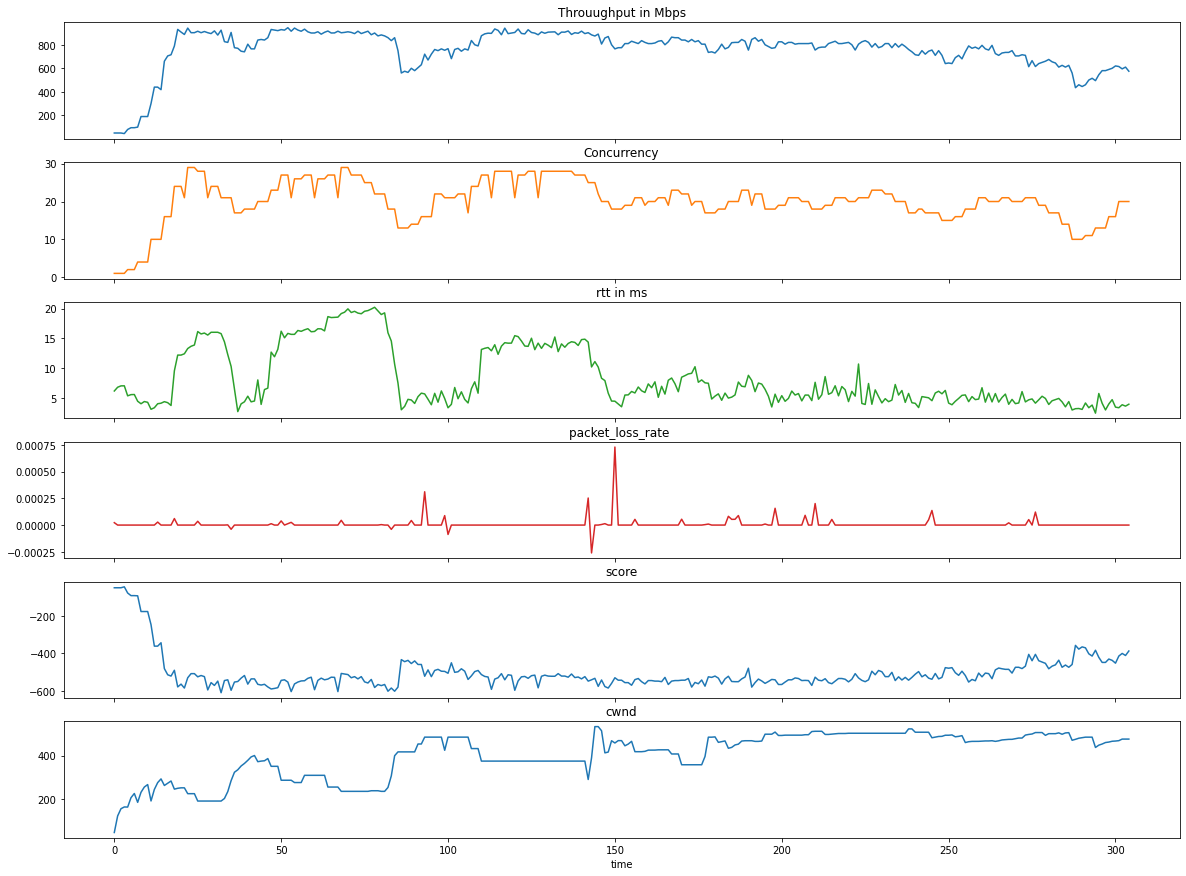

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_09_01.csv",sep='\t')
df = pd.DataFrame(data)
df.info()
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        263 non-null    int64  
 1   curr_thrpt        263 non-null    float64
 2   goodput           263 non-null    int64  
 3   cc_level          263 non-null    int64  
 4   cwnd              263 non-null    float64
 5   rtt               263 non-null    float64
 6   packet_loss_rate  263 non-null    float64
 7   score             263 non-null    float64
 8   date_time         263 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 18.6+ KB


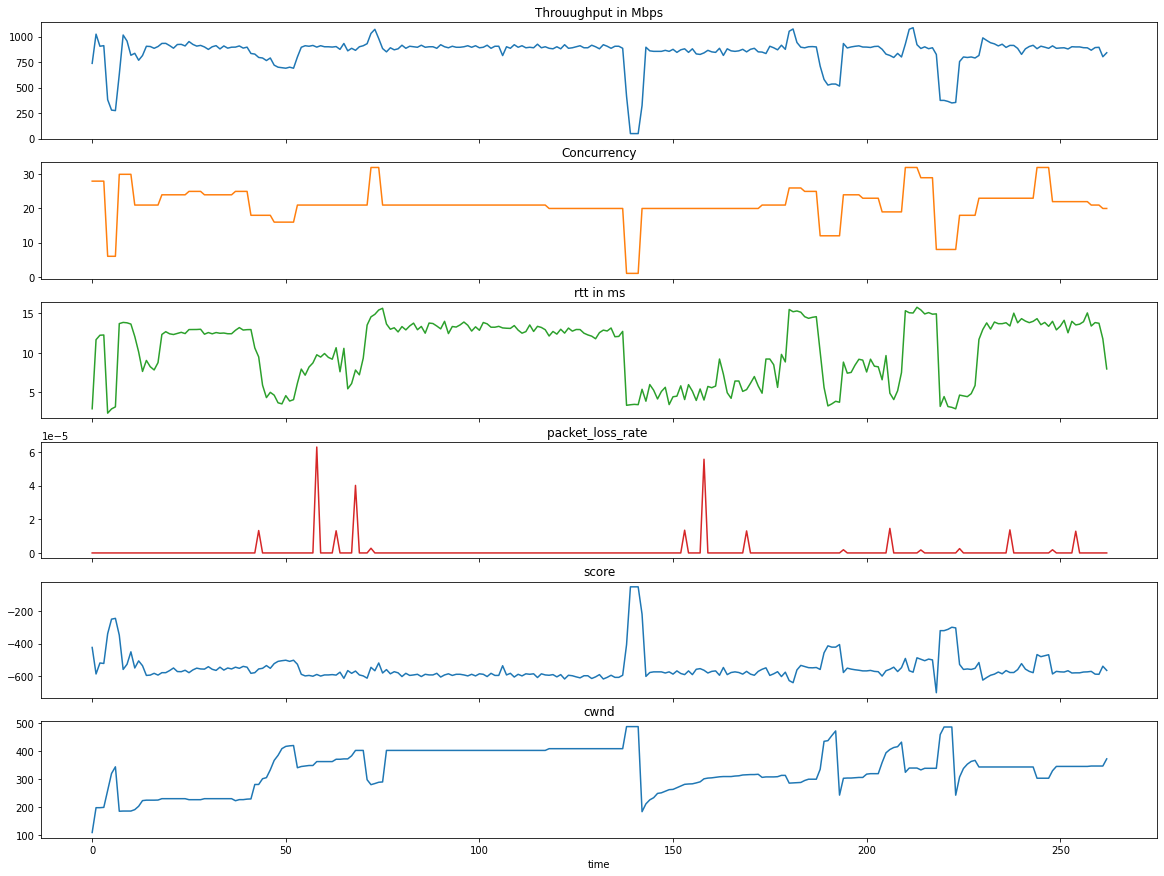

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("record_07_23_2022_14_19_23.csv",sep='\t')
df = pd.DataFrame(data)
df.info()
import matplotlib
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')
# ax.xaxis.set_tick_params(labelsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        371 non-null    int64  
 1   curr_thrpt        371 non-null    float64
 2   goodput           371 non-null    int64  
 3   cc_level          371 non-null    int64  
 4   cwnd              371 non-null    float64
 5   rtt               371 non-null    float64
 6   packet_loss_rate  371 non-null    float64
 7   score             371 non-null    float64
 8   date_time         371 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.2+ KB


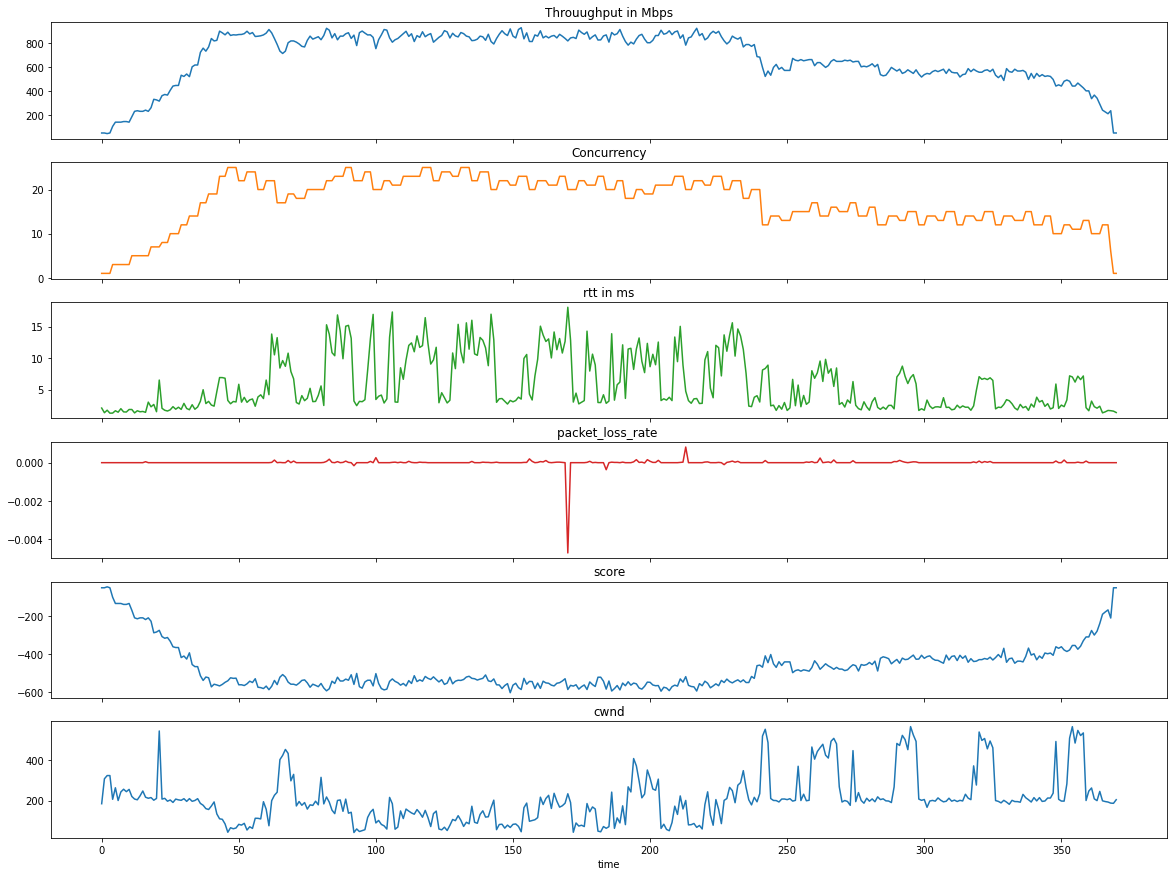

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_31_40.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        348 non-null    int64  
 1   curr_thrpt        348 non-null    float64
 2   goodput           348 non-null    int64  
 3   cc_level          348 non-null    int64  
 4   cwnd              348 non-null    float64
 5   rtt               348 non-null    float64
 6   packet_loss_rate  348 non-null    float64
 7   score             348 non-null    float64
 8   date_time         348 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 24.6+ KB


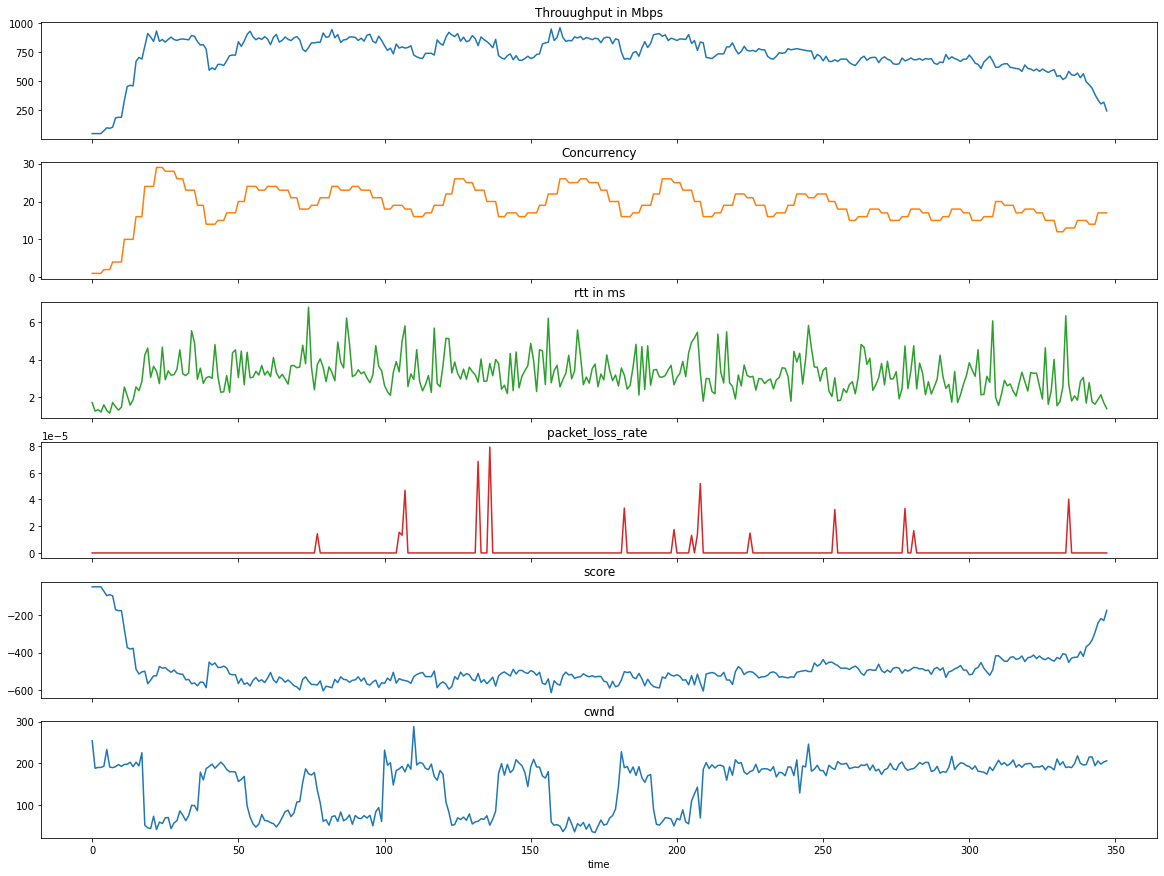

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_46_11.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        373 non-null    int64  
 1   curr_thrpt        373 non-null    float64
 2   goodput           373 non-null    int64  
 3   cc_level          373 non-null    int64  
 4   cwnd              373 non-null    float64
 5   rtt               373 non-null    float64
 6   packet_loss_rate  373 non-null    float64
 7   score             373 non-null    float64
 8   date_time         373 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.4+ KB


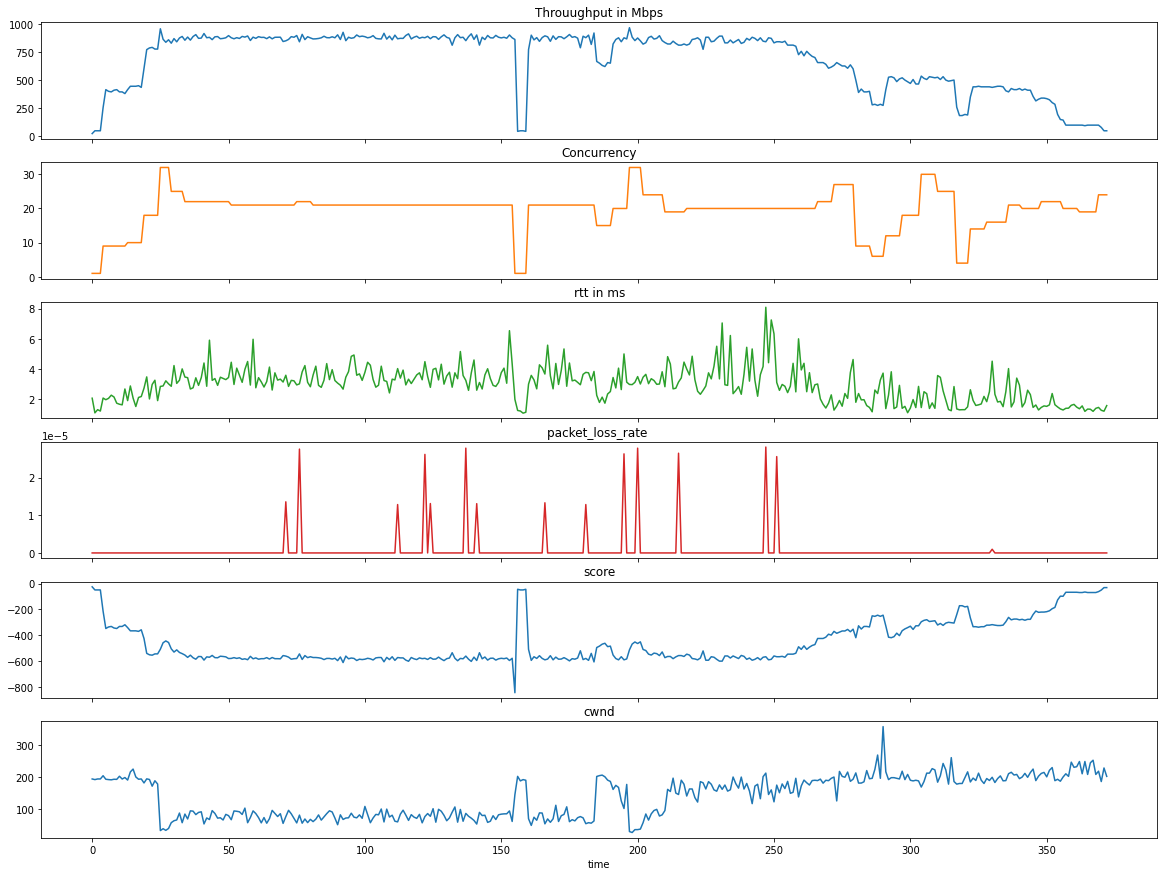

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_53_29.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        385 non-null    int64  
 1   curr_thrpt        385 non-null    float64
 2   goodput           385 non-null    int64  
 3   cc_level          385 non-null    int64  
 4   cwnd              385 non-null    float64
 5   rtt               385 non-null    float64
 6   packet_loss_rate  385 non-null    float64
 7   score             385 non-null    float64
 8   date_time         385 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.2+ KB


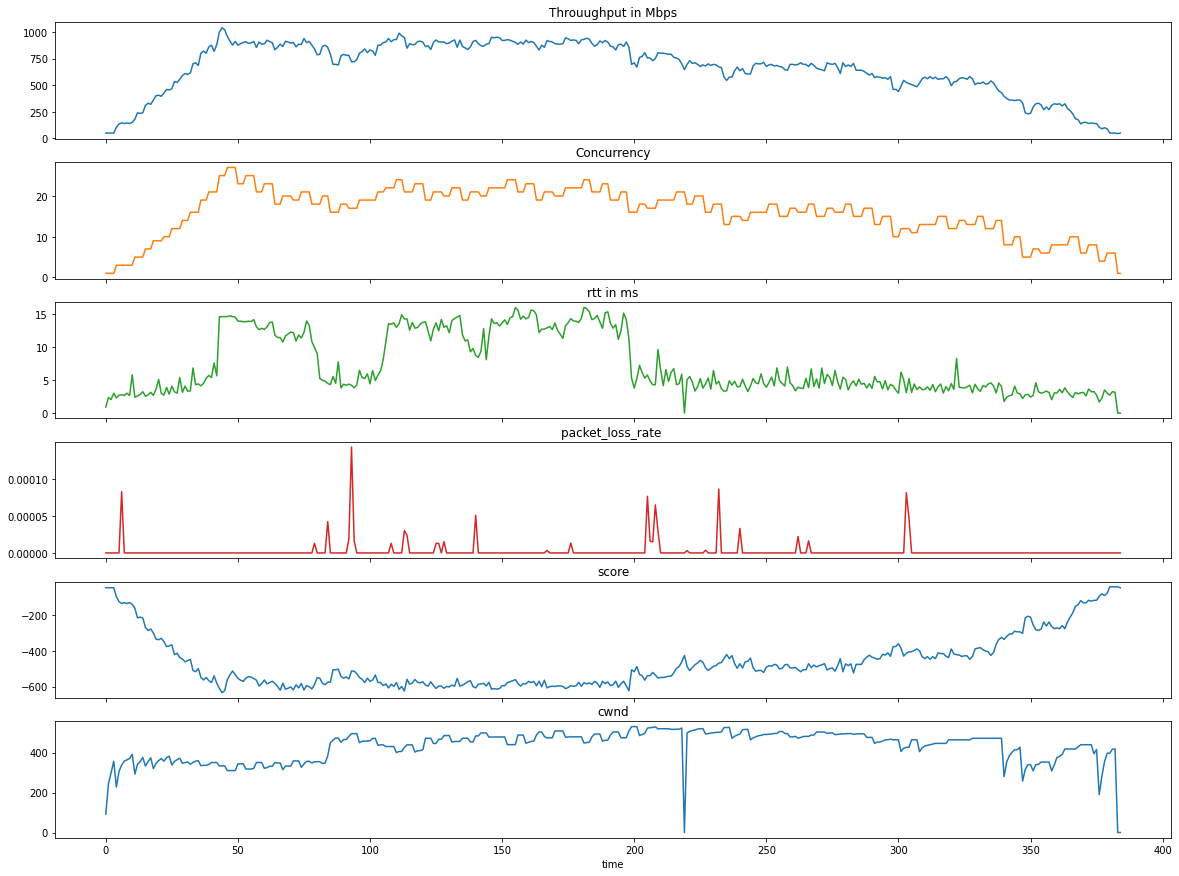

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_17_05_14.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        341 non-null    int64  
 1   curr_thrpt        341 non-null    float64
 2   goodput           341 non-null    int64  
 3   cc_level          341 non-null    int64  
 4   cwnd              341 non-null    float64
 5   rtt               341 non-null    float64
 6   packet_loss_rate  341 non-null    float64
 7   score             341 non-null    float64
 8   date_time         341 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 24.1+ KB


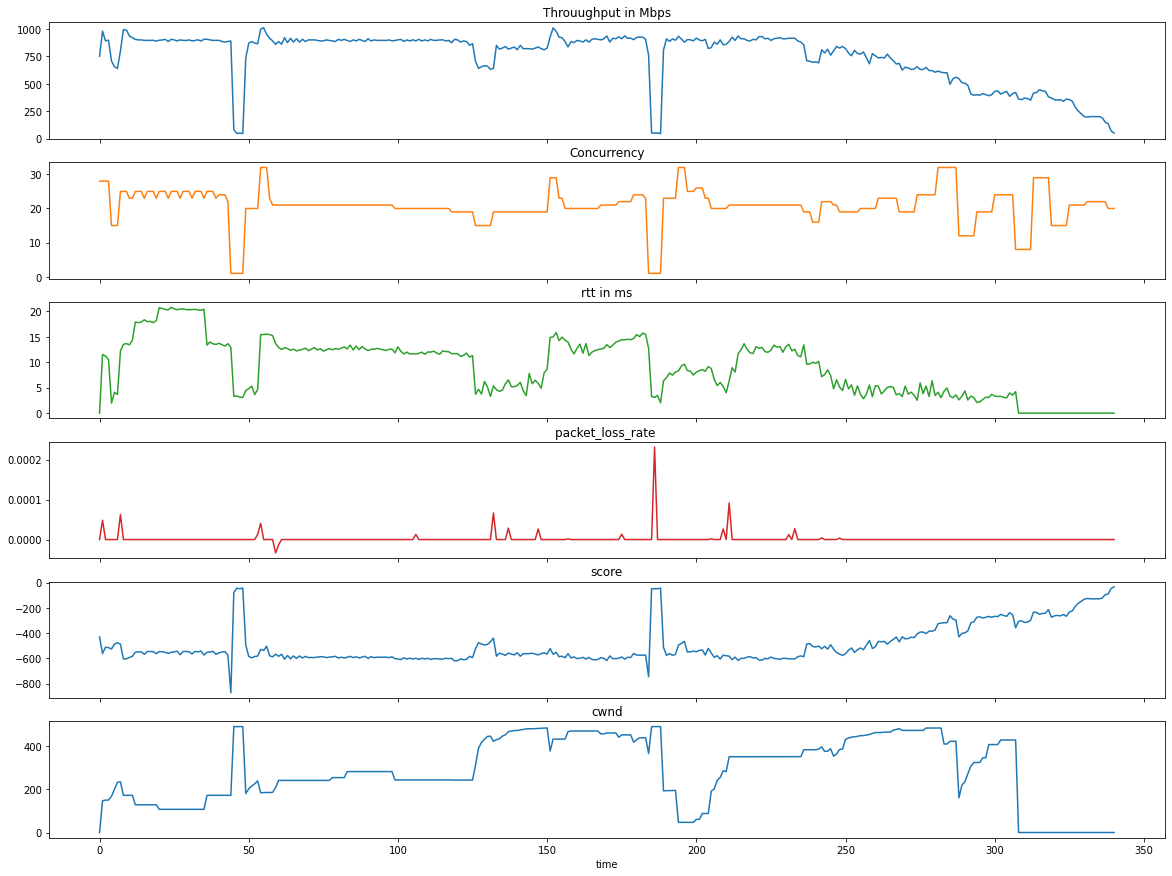

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_17_13_55.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        370 non-null    int64  
 1   curr_thrpt        370 non-null    float64
 2   goodput           370 non-null    int64  
 3   cc_level          370 non-null    int64  
 4   cwnd              370 non-null    float64
 5   rtt               370 non-null    float64
 6   packet_loss_rate  370 non-null    float64
 7   score             370 non-null    float64
 8   date_time         370 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.1+ KB


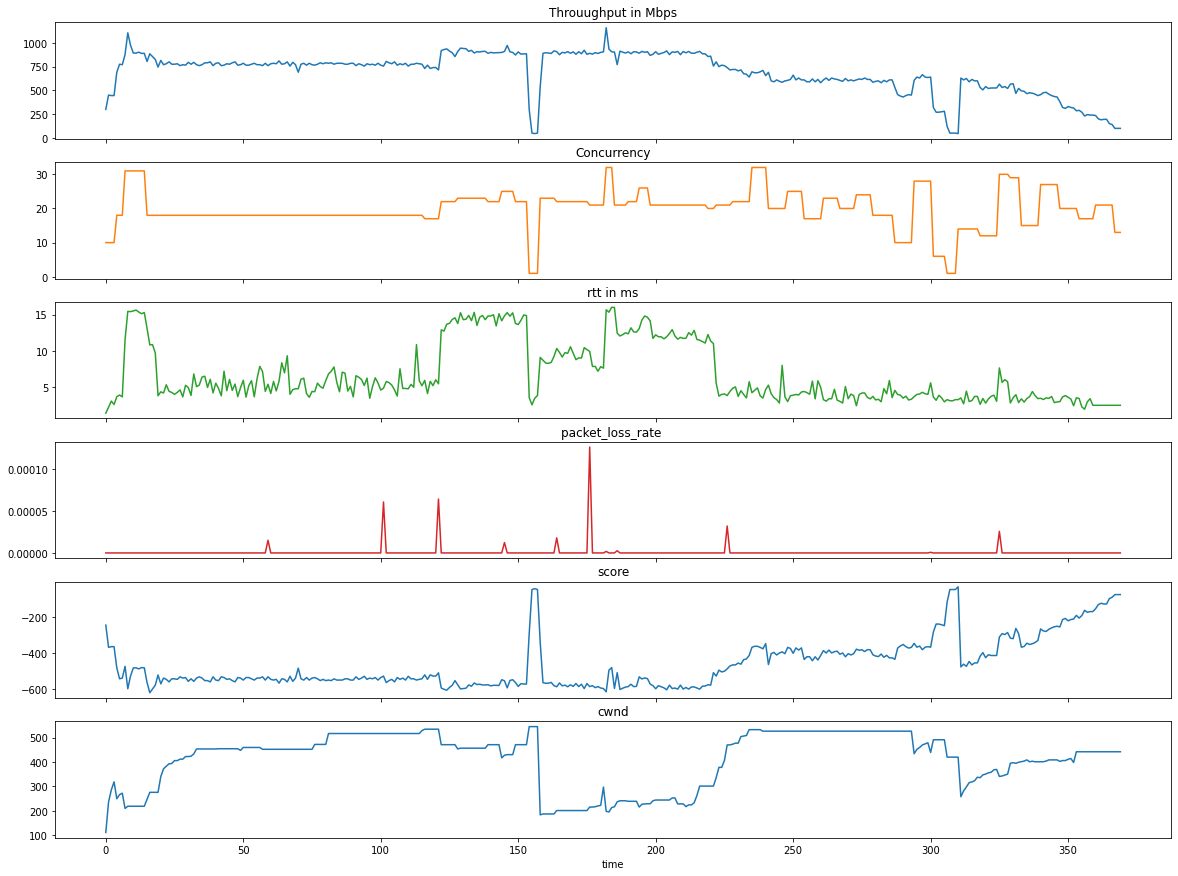

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_00_43.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        352 non-null    int64  
 1   curr_thrpt        352 non-null    float64
 2   goodput           352 non-null    int64  
 3   cc_level          352 non-null    int64  
 4   cwnd              352 non-null    float64
 5   rtt               352 non-null    float64
 6   packet_loss_rate  352 non-null    float64
 7   score             352 non-null    float64
 8   date_time         352 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 24.9+ KB


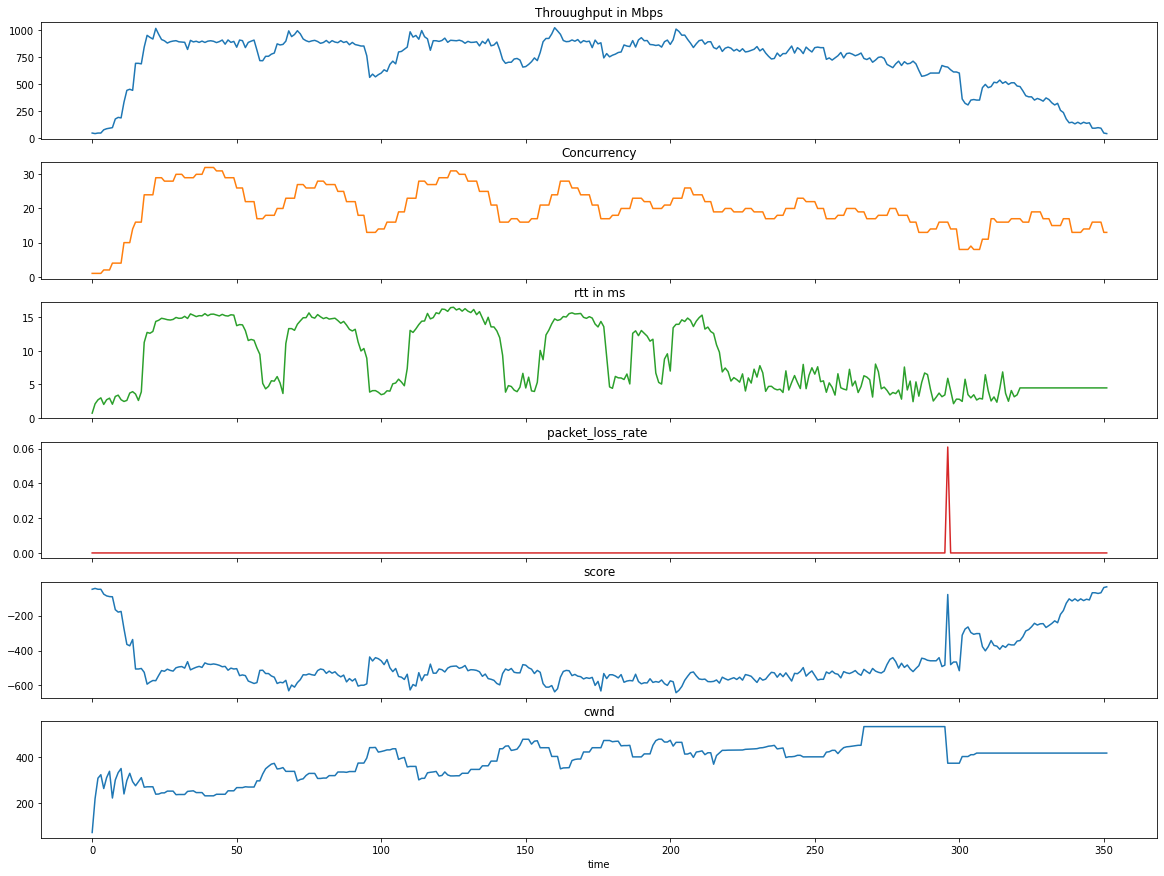

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_17_07.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        394 non-null    int64  
 1   curr_thrpt        394 non-null    float64
 2   goodput           394 non-null    int64  
 3   cc_level          394 non-null    int64  
 4   cwnd              394 non-null    float64
 5   rtt               394 non-null    float64
 6   packet_loss_rate  394 non-null    float64
 7   score             394 non-null    float64
 8   date_time         394 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.8+ KB


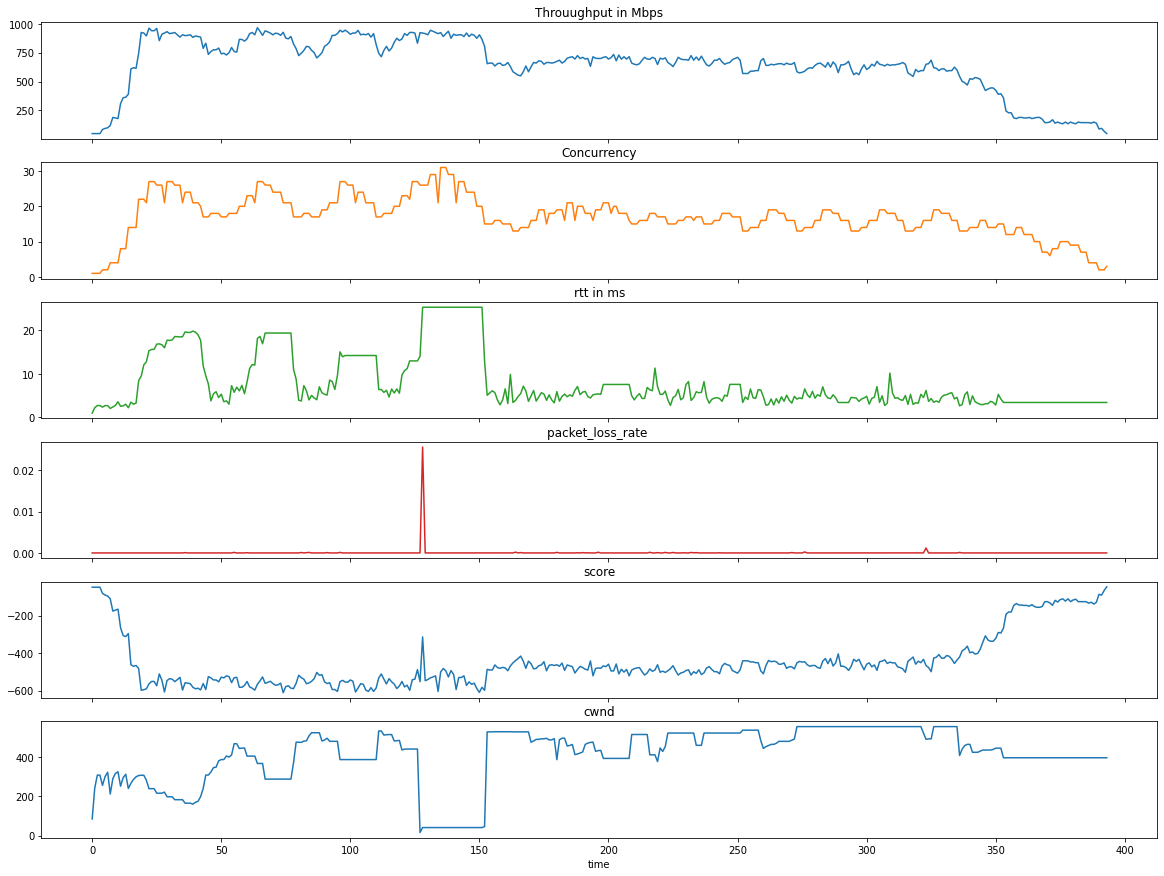

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_30_00.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        322 non-null    int64  
 1   curr_thrpt        322 non-null    float64
 2   goodput           322 non-null    int64  
 3   cc_level          322 non-null    int64  
 4   cwnd              322 non-null    float64
 5   rtt               322 non-null    float64
 6   packet_loss_rate  322 non-null    float64
 7   score             322 non-null    float64
 8   date_time         322 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 22.8+ KB


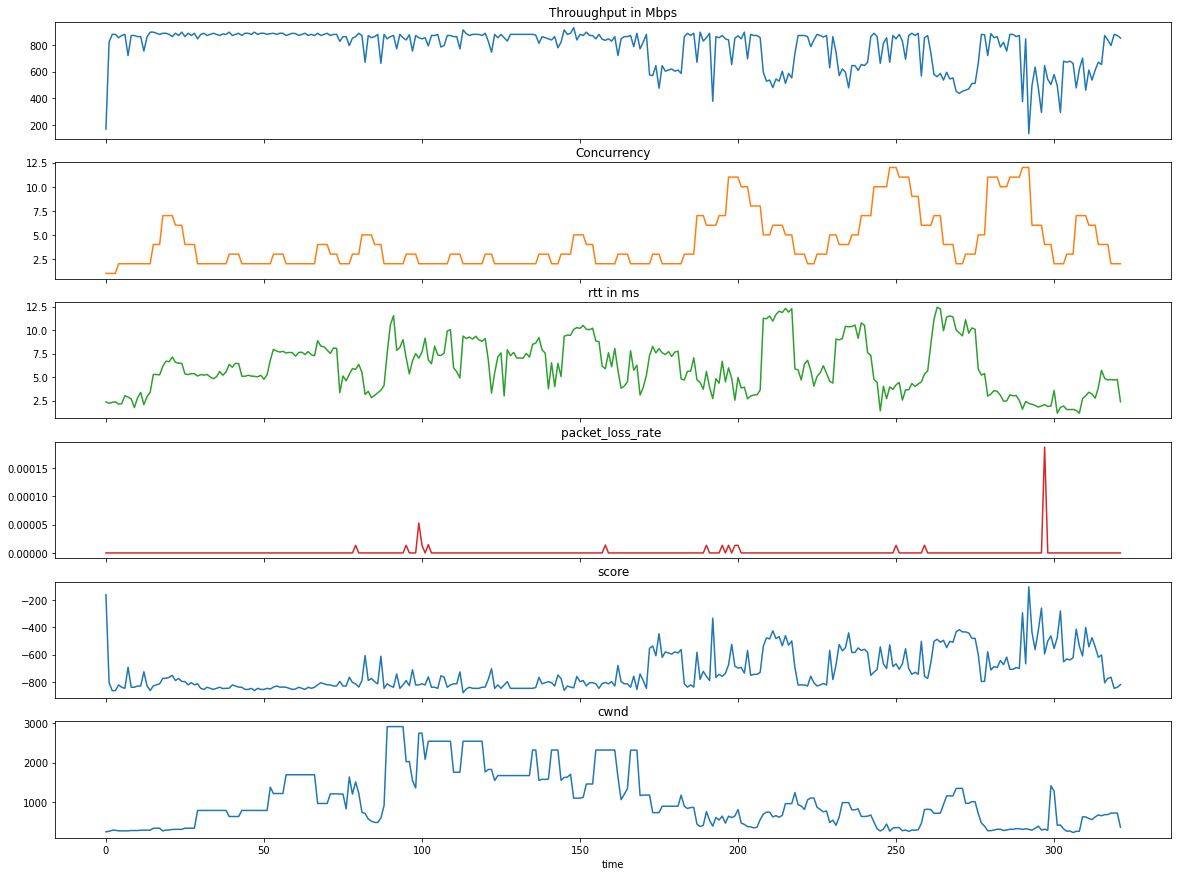

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_50_59.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        358 non-null    int64  
 1   curr_thrpt        358 non-null    float64
 2   goodput           358 non-null    int64  
 3   cc_level          358 non-null    int64  
 4   cwnd              358 non-null    float64
 5   rtt               358 non-null    float64
 6   packet_loss_rate  358 non-null    float64
 7   score             358 non-null    float64
 8   date_time         358 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 25.3+ KB


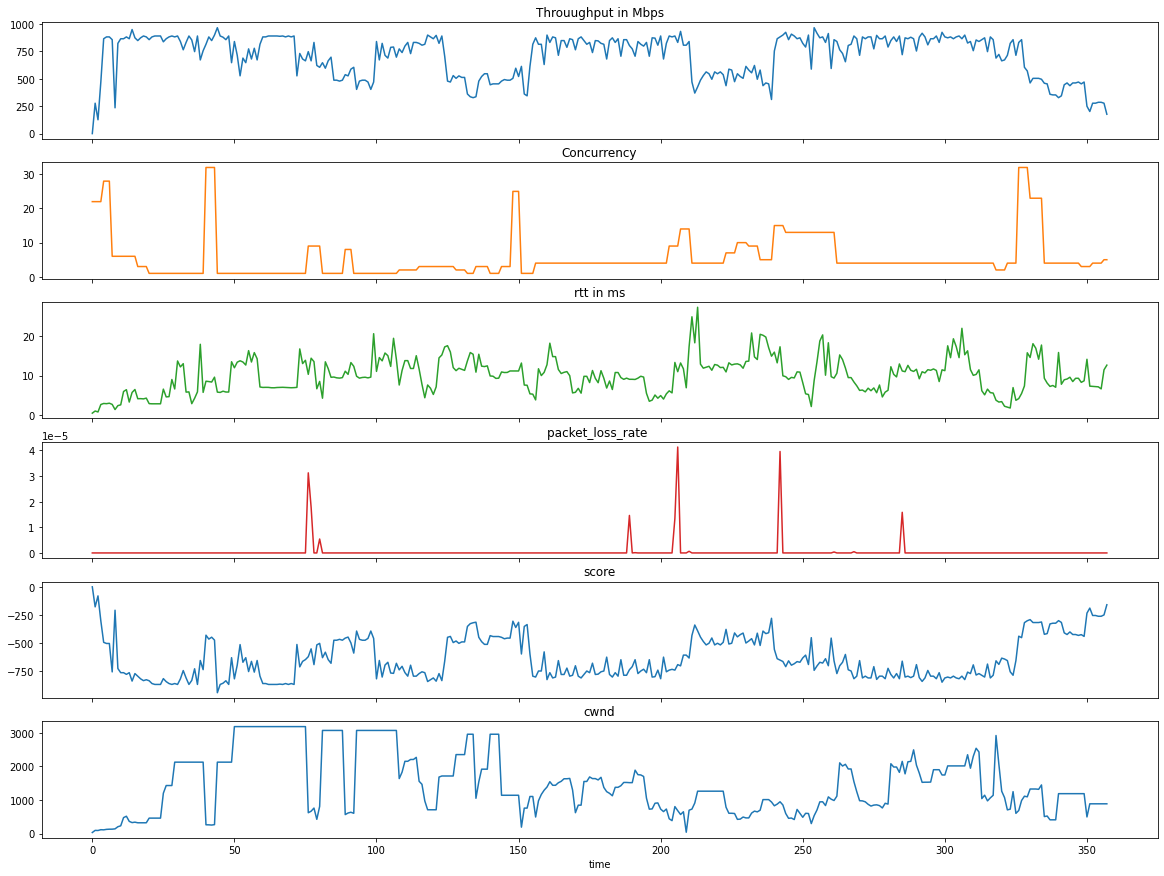

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_59_28.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        374 non-null    int64  
 1   curr_thrpt        374 non-null    float64
 2   goodput           374 non-null    int64  
 3   cc_level          374 non-null    int64  
 4   cwnd              374 non-null    float64
 5   rtt               374 non-null    float64
 6   packet_loss_rate  374 non-null    float64
 7   score             374 non-null    float64
 8   date_time         374 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.4+ KB


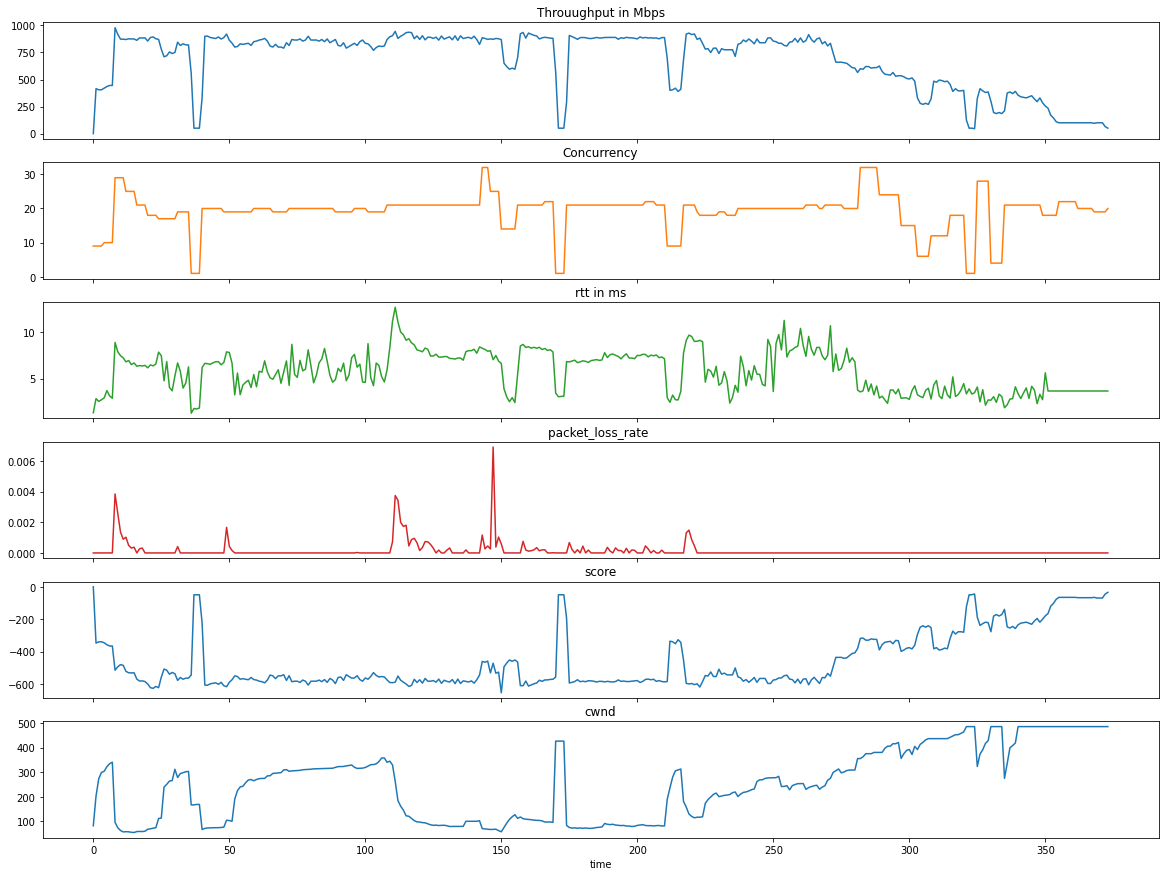

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_25_2022_11_59_39.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        506 non-null    int64  
 1   curr_thrpt        506 non-null    float64
 2   goodput           506 non-null    int64  
 3   cc_level          506 non-null    int64  
 4   cwnd              506 non-null    float64
 5   rtt               506 non-null    float64
 6   packet_loss_rate  506 non-null    float64
 7   score             506 non-null    float64
 8   date_time         506 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 35.7+ KB


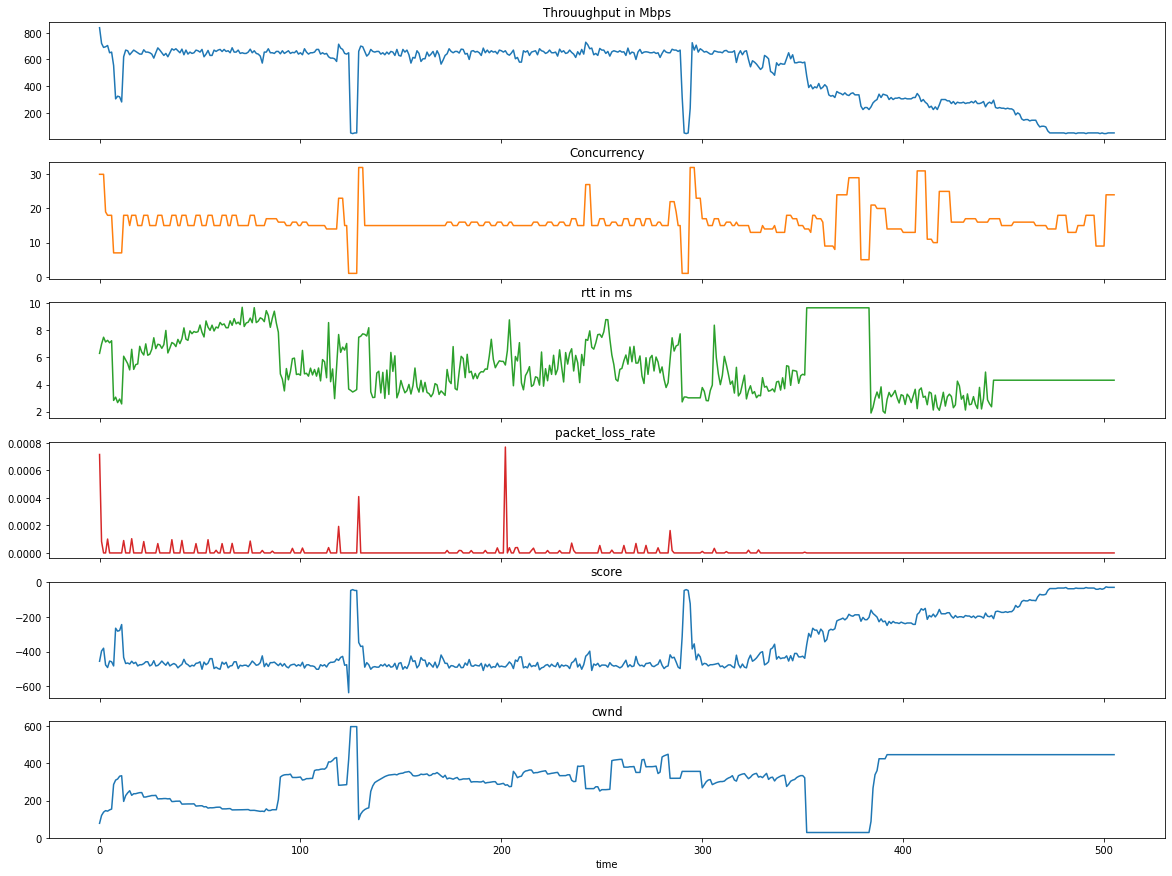

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_25_2022_12_27_17.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        417 non-null    int64  
 1   curr_thrpt        417 non-null    float64
 2   goodput           417 non-null    int64  
 3   cc_level          417 non-null    int64  
 4   cwnd              417 non-null    float64
 5   rtt               417 non-null    float64
 6   packet_loss_rate  417 non-null    float64
 7   score             417 non-null    float64
 8   date_time         417 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 29.4+ KB


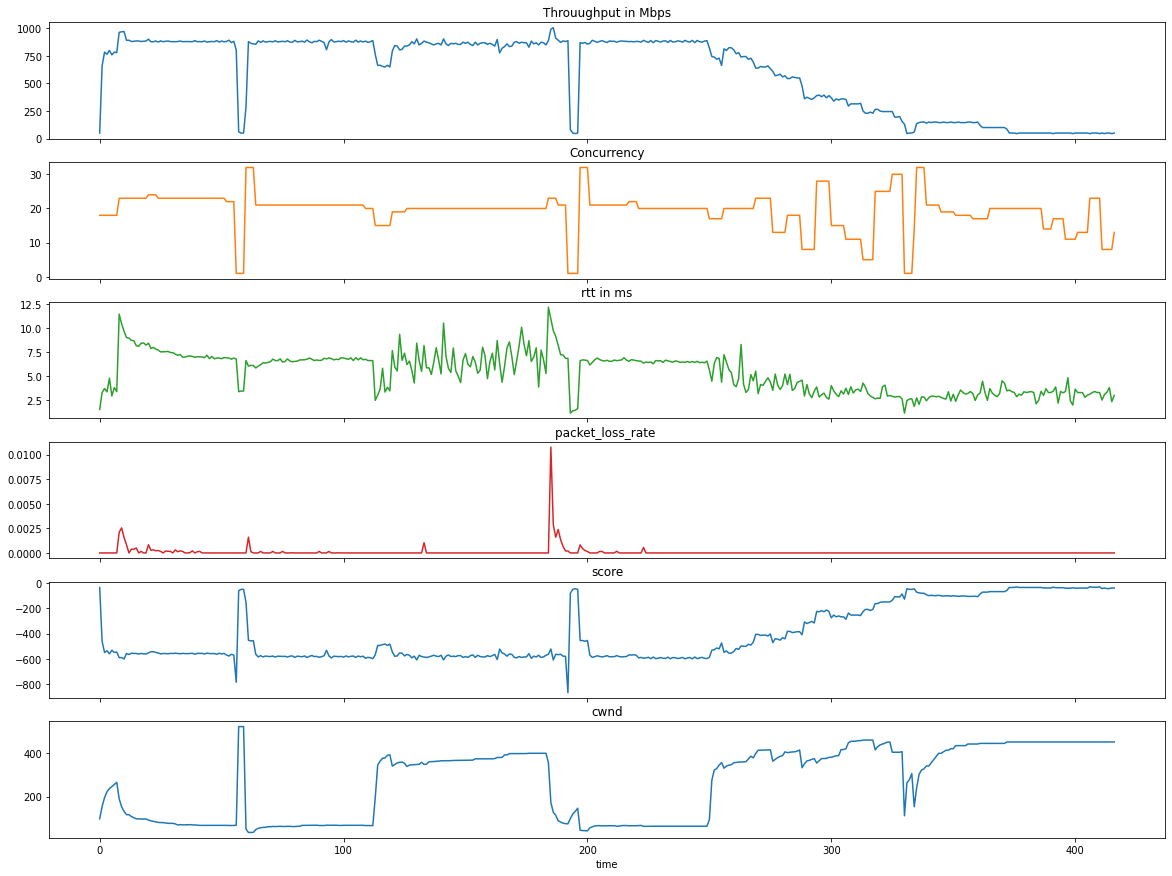

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_26_2022_10_59_29.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        386 non-null    int64  
 1   curr_thrpt        386 non-null    float64
 2   goodput           386 non-null    int64  
 3   cc_level          386 non-null    int64  
 4   cwnd              386 non-null    float64
 5   rtt               386 non-null    float64
 6   packet_loss_rate  386 non-null    float64
 7   score             386 non-null    float64
 8   date_time         386 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.3+ KB


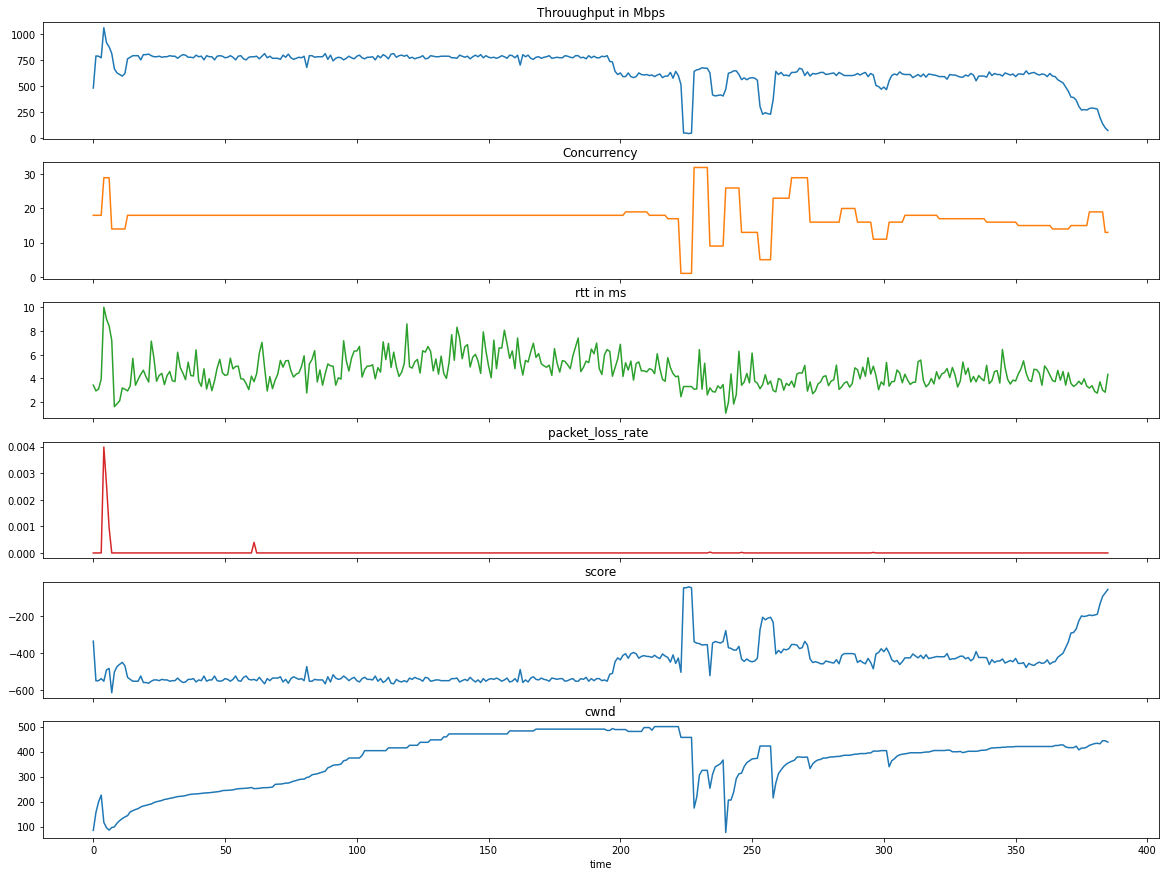

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_26_2022_11_06_12.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        406 non-null    int64  
 1   curr_thrpt        406 non-null    float64
 2   cc_level          406 non-null    int64  
 3   cwnd              406 non-null    float64
 4   rtt               406 non-null    float64
 5   packet_loss_rate  406 non-null    float64
 6   score             406 non-null    float64
 7   date_time         406 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.5+ KB


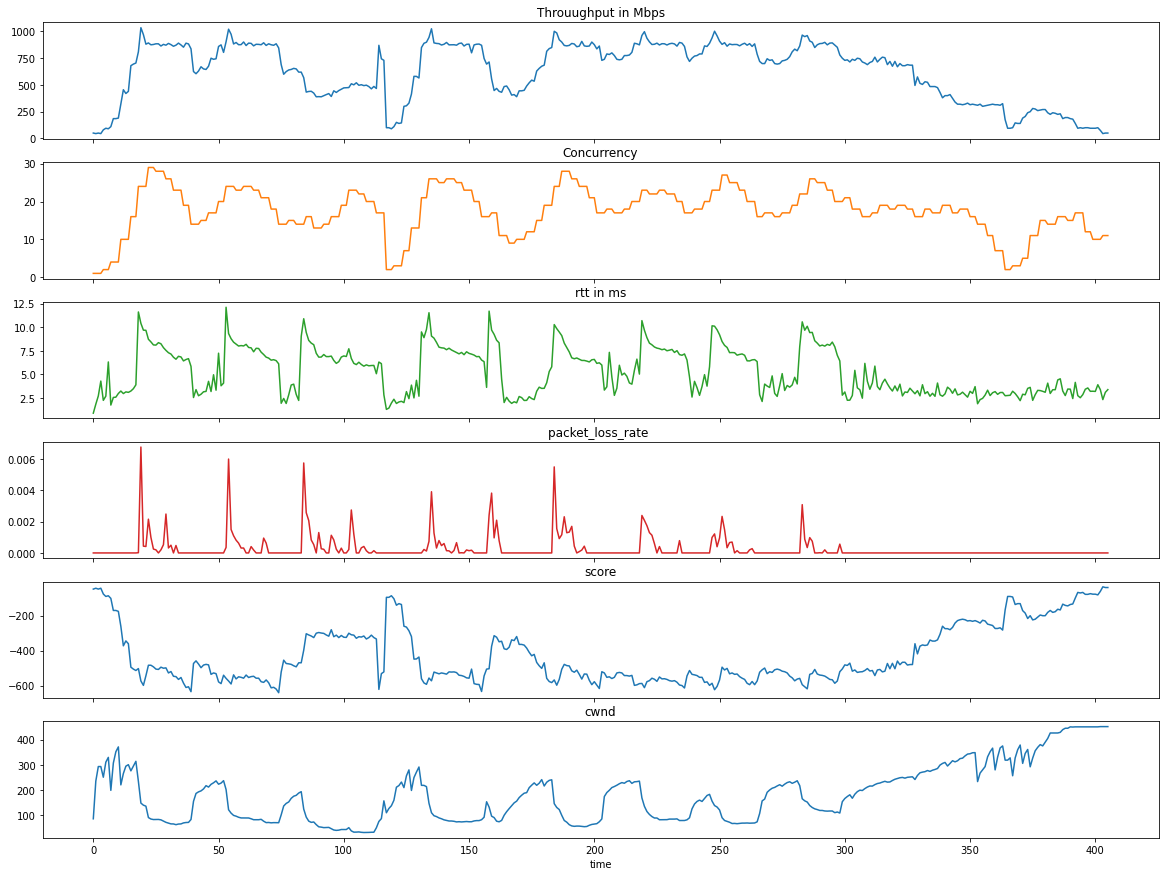

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_29_2022_14_52_25.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        383 non-null    int64  
 1   curr_thrpt        383 non-null    float64
 2   cc_level          383 non-null    int64  
 3   cwnd              383 non-null    float64
 4   rtt               383 non-null    float64
 5   packet_loss_rate  383 non-null    float64
 6   score             383 non-null    float64
 7   date_time         383 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 24.1+ KB


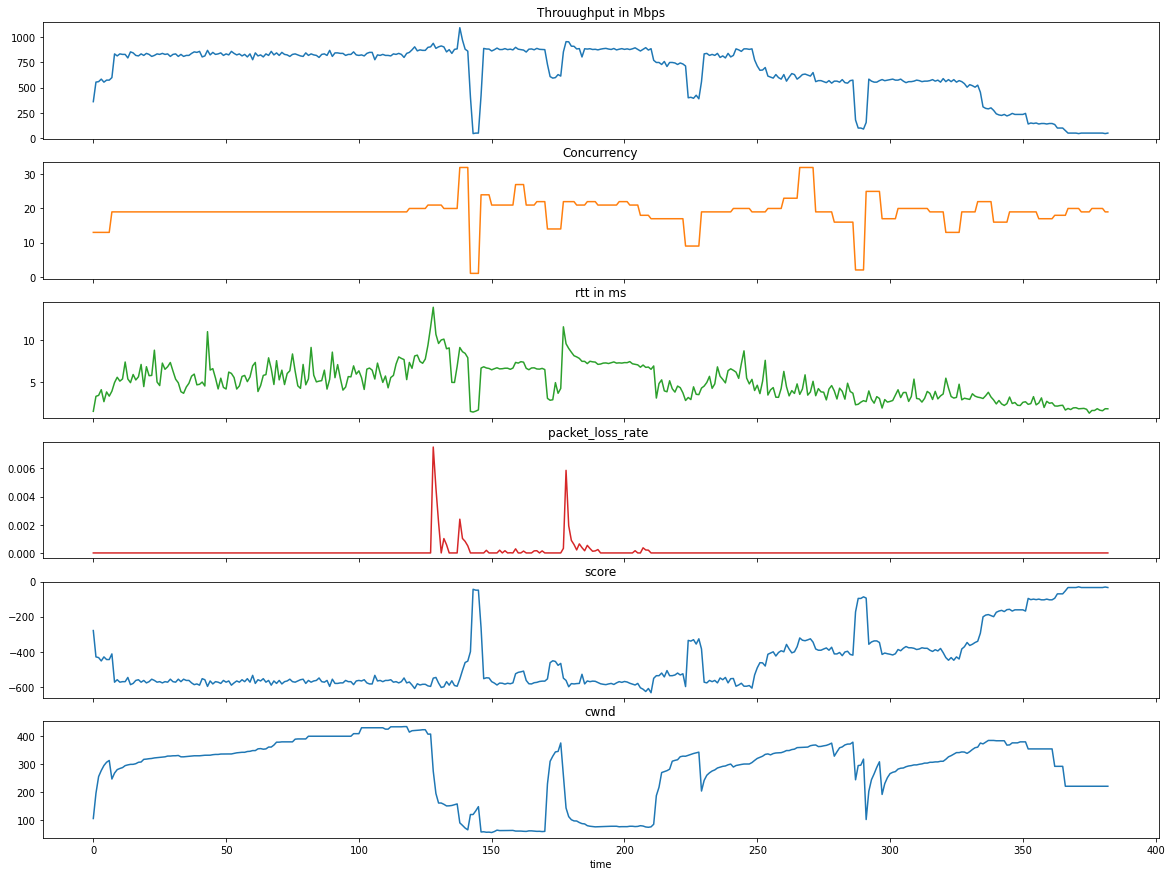

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_29_2022_13_54_54.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   curr_thrpt        1080 non-null   float64
 1   cc_level          1080 non-null   int64  
 2   cwnd              1080 non-null   float64
 3   rtt               1080 non-null   float64
 4   packet_loss_rate  1080 non-null   float64
 5   score             1080 non-null   float64
 6   date_time         1080 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 59.2+ KB


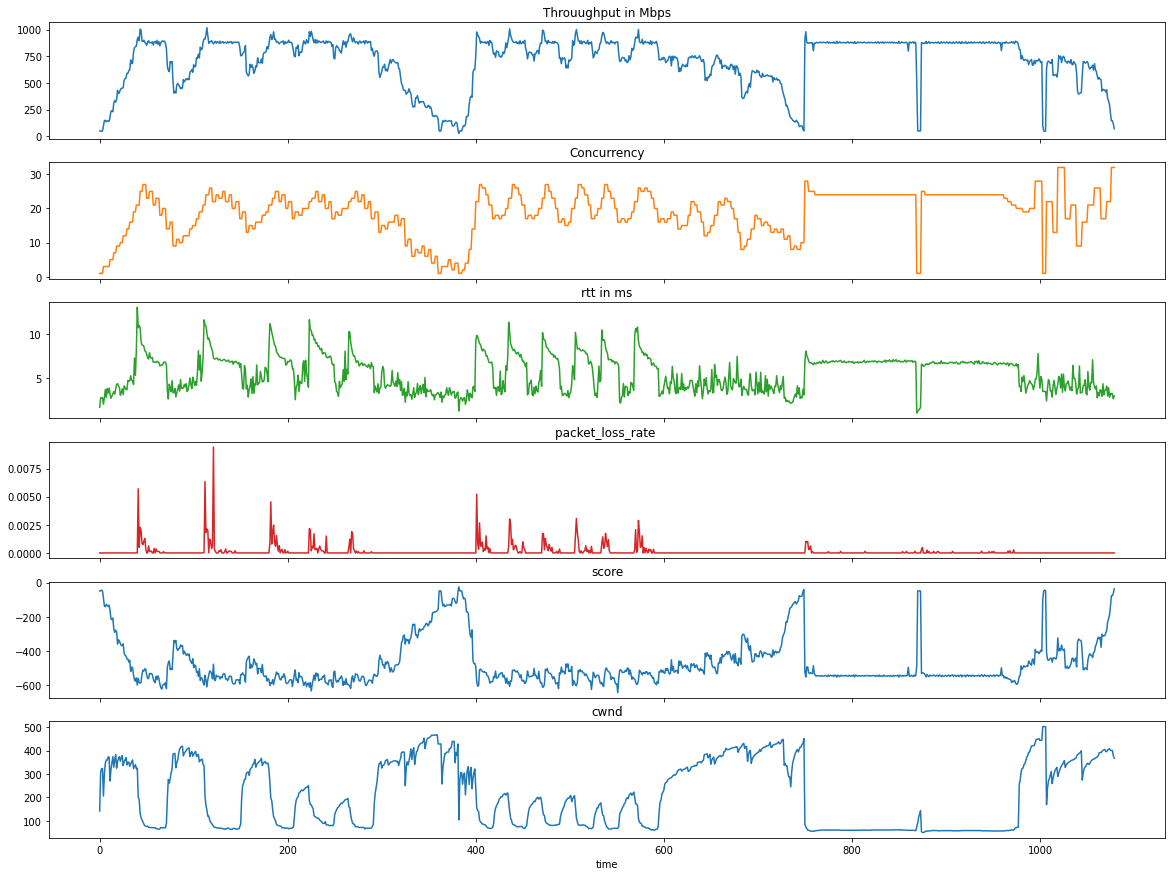

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_08_03_2022_13_57_55.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   curr_thrpt        1129 non-null   float64
 1   cc_level          1129 non-null   int64  
 2   cwnd              1129 non-null   float64
 3   rtt               1129 non-null   float64
 4   packet_loss_rate  1129 non-null   float64
 5   score             1129 non-null   float64
 6   date_time         1129 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 61.9+ KB


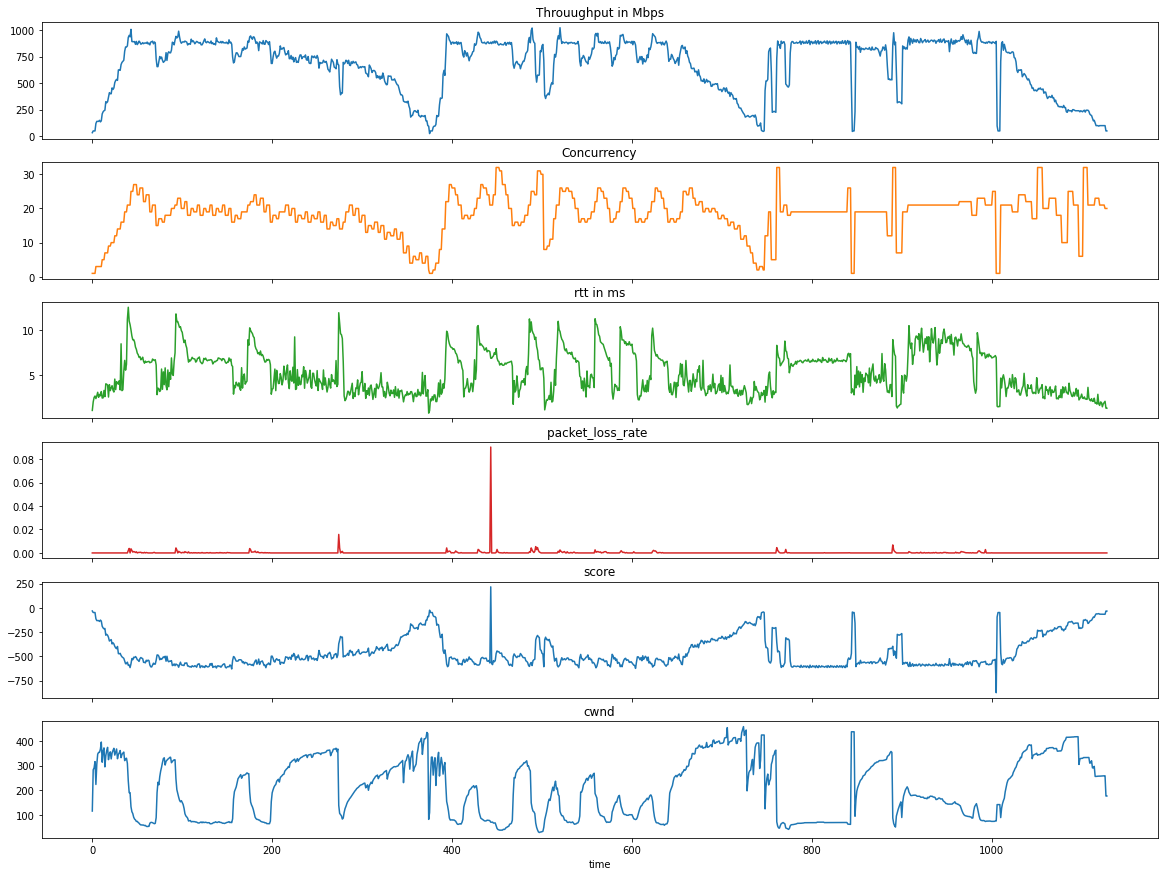

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_29_2022_15_55_08.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
98